# WORKING WITH IMAGES USING SCIKITLEARN FOR CLASSIFICATION

# 1. GREYSCALE IMAGES

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target  # X: images flattened, y: labels

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



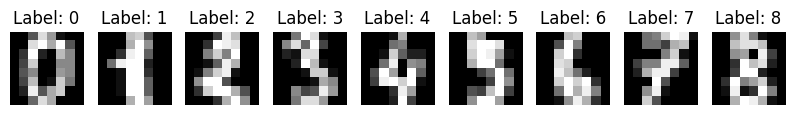

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 9, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

# 2. COLOURED IMAGES

In [23]:
#IMPORTING NECESSARY LIBS
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# Paths to your happy and sad folders
happy_folder = r"C:\newenv\ImageClassification-main\data\happy"
sad_folder = r"C:\newenv\ImageClassification-main\data\sad"

In [27]:
# Image size for resizing (keep it small to avoid large feature vectors)
IMG_SIZE = (64, 64)

In [29]:
def load_images_from_folder(folder, label):
    data = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            path = os.path.join(folder, filename)
            img = Image.open(path).convert("RGB")        # Keep color
            img = img.resize(IMG_SIZE)
            img_array = np.array(img).flatten()          # Convert to 1D vector
            data.append(img_array)
            labels.append(label)
    return data, labels

In [31]:
# Load happy and sad images
happy_data, happy_labels = load_images_from_folder(happy_folder, 1)
sad_data, sad_labels = load_images_from_folder(sad_folder, 0)

In [33]:
# Combine
X = np.array(happy_data + sad_data)
y = np.array(happy_labels + sad_labels)

In [35]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [39]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.81      0.81      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [47]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')  # or 'linear'
model.fit(X_train, y_train)

SVC()

In [49]:

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.82      0.87      0.84        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.87      0.87      0.87        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

